<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_4_3_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=500, noise=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

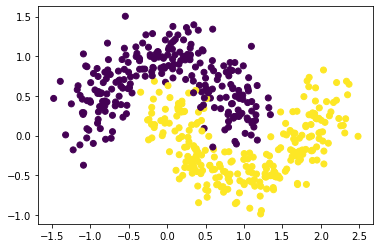

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

# Random Forest

## Visualisation

In [3]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

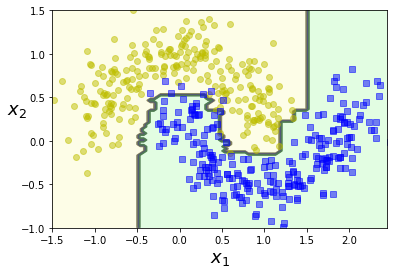

In [5]:
plot_decision_boundary(rnd_clf, X, y)

## Principe de random forest

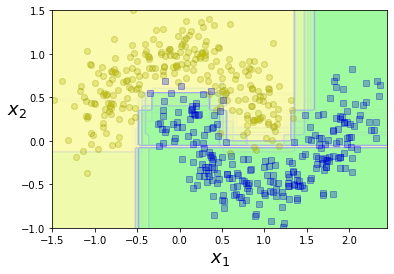

In [6]:
plt.figure(figsize=(6, 4))

from sklearn.tree import DecisionTreeClassifier

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.show()

## Importance des features

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)

rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [8]:
importance=rnd_clf.feature_importances_
importance

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

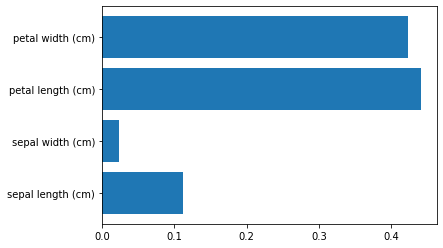

In [9]:
import matplotlib.pyplot as plt

importance=rnd_clf.feature_importances_

plt.barh(iris["feature_names"],importance)
plt.show()

# Ramdom Forest classification

**Question** construire un modèle de classification Random Forest pour la base `breast_cancer`.

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)

rnd_clf.fit(cancer["data"], cancer["target"])


y_pred2 = rnd_clf.predict(cancer["data"])
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [21]:
for name, score in zip(cancer["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

mean radius 0.04426703180251875
mean texture 0.015112805619746933
mean perimeter 0.0474538785291643
mean area 0.04785370780971197
mean smoothness 0.006451382151944569
mean compactness 0.012575272547386702
mean concavity 0.051233013846443055
mean concave points 0.09848746348142805
mean symmetry 0.003742097904613899
mean fractal dimension 0.00343838258046333
radius error 0.017245330225097843
texture error 0.003791460043771214
perimeter error 0.010364906708989794
area error 0.03511755307999009
smoothness error 0.004866336539866626
compactness error 0.0045510370376920925
concavity error 0.005810394436635287
concave points error 0.006857937730478569
symmetry error 0.0038767638611534525
fractal dimension error 0.00475989533513289
worst radius 0.08702304651329545
worst texture 0.01657898411370771
worst perimeter 0.1362174698906144
worst area 0.12723344927036784
worst smoothness 0.012612296341251604
worst compactness 0.015898274646051227
worst concavity 0.03504400414587846
worst concave points

**Question** afficher l'importance des variables

In [22]:
importance=rnd_clf.feature_importances_
importance

array([0.04426703, 0.01511281, 0.04745388, 0.04785371, 0.00645138,
       0.01257527, 0.05123301, 0.09848746, 0.0037421 , 0.00343838,
       0.01724533, 0.00379146, 0.01036491, 0.03511755, 0.00486634,
       0.00455104, 0.00581039, 0.00685794, 0.00387676, 0.0047599 ,
       0.08702305, 0.01657898, 0.13621747, 0.12723345, 0.0126123 ,
       0.01589827, 0.035044  , 0.12551067, 0.0096096 , 0.00641555])

# Random Forest régression

**Question** construire un modèle de Random Forest pour prédire le prix immobilier.

In [24]:
import pandas as pd
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")
housing = housing.replace(to_replace='yes', value=1, regex=True)
housing = housing.replace(to_replace='no', value=0, regex=True)

from sklearn.model_selection import train_test_split

X = housing[['lotsize','bedrooms','stories','bathrms','bathrms','driveway','recroom',
        'fullbase','gashw','airco','garagepl','prefarea']]

y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestRegressor

reg_clf = RandomForestRegressor(n_estimators=500,max_leaf_nodes=20,random_state=55)
reg_clf.fit(X_train, y_train)

y_pred_reg = reg_clf.predict(X_test)
y_pred_reg

array([ 475123.94574768,  471577.68435784,  773236.31471903,
        492060.48121362,  945906.83205813, 1002657.81826412,
       1022028.08253812,  458634.98687234,  893172.67009112,
        521409.06766249,  960204.08568775, 1150248.26924771,
        481286.21274479,  556061.05679873,  509267.30185776,
        650504.92490664,  794800.16453578,  797404.6046389 ,
        577291.16017827,  513717.29517522,  555011.40190664,
        483495.53287175,  767084.94226654,  482769.88453684,
        942738.50170357,  575679.18695672,  562209.67976798,
        526168.52552863,  492865.38940799,  613811.16421302,
        824681.93390477,  477021.19431105,  693309.16938621,
        689870.93538816,  717499.31801075,  517872.89986015,
        555770.25299141,  994958.6357598 ,  495932.24566623,
        579746.59943917,  695200.34822612,  494629.47137131,
        622929.71928474,  496146.01771607,  498697.31912912,
        537872.26616386,  537797.66984026,  508278.35242545,
        624768.00342074,

**Question** Comparer avec les résultats avec les autres algorithmes.

In [29]:
for name, score in zip(housing.index, reg_clf.feature_importances_):
    print(name, score)

0 0.5134351442008391
1 0.03119229728695544
2 0.045809652324005946
3 0.08790977091448493
4 0.09085597227371665
5 0.005019486317210318
6 0.010658517708425293
7 0.03178822055913889
8 0.020119042998457674
9 0.0532605815554203
10 0.07535787362996657
11 0.03459344023137895


**Question** afficher l'importance des variables

In [26]:
importance=reg_clf.feature_importances_
importance

array([0.51343514, 0.0311923 , 0.04580965, 0.08790977, 0.09085597,
       0.00501949, 0.01065852, 0.03178822, 0.02011904, 0.05326058,
       0.07535787, 0.03459344])